# I Konvoliuciniai neuroniniai tinklai

Konvoliuciniai NN yra labai geri darbui su vaizdo duomenimis ir tai yra gana didelė tema kuria galėtume aptarinėti savaitėmis bet pamėginsime susitelkti ir aptarti esminias koncepcijas, veikimo principus ir taikymo metodus per kelias paskaitas. Yra gan nemažai CNN architektūrų kurios buvo sukurtos per paskutinius metus, kaip <code>**ResNet, VGG, Inception ir t.t**</code>, aptarsime keletą jų smulkiau bet pradžiai nagrinėsime bendrą principą kaip šie tinklai veikia. 

## Temos

<code>**1  : Ką gali CNN**</code><br>
<code>**2  : Vaizdų klasifikavimas ir su tuo susiję iššūkiai**</code><br>
<code>**3  : CNN pagrindai**</code><br>
<code>**4  : Konvoliuciniai filtrai ir svorio pasidalijimas**</code><br>
<code>**5  : Skirtumas tarp kryžminės koreliacijos ir konvoliucijos**</code><br>
<code>**6  : CNN atgalinis skaičiavimas (backpropagation)**</code><br>
<code>**7  : CNN architektūra ir AlexNet**</code><br>
<code>**8  : Ką mato CNN**</code><br>
<code>**9  : CNN taikymas: LeNet-5 (PyTorch)**</code><br>
<code>**10 : CNN taikymas: AlexNet (PyTorch)**</code><br>
<code>**11 : Modelių išsaugojimas ir įkėlimas (PyTorch)**</code><br>

In [2]:
#TODO neviršyk ~ 2:30:00 (sek laiką!)

## Įvadas, ką gali CNN

Dažniausias ir paprasčiausias šių tinklų taikymas yra vaizdų klasifikavimas. Tai gali būti šiek tiek panašų į binarinę ar daugianarę klasifikacija su logistinę regresija, tik mūsų įvestis yra specialus duomenų tipas t.y vaizdai. Žemiau turime supaprastinta problemos schema, atpažinti kates ir šunys. Įvesties vaizdas yra keliamas į tinklą, keliauja per konvoliucinius sluoknsius ir gale dažniausiai yra pilnai sujungtas sluoksnis ar sluoksniai (schemoje jų nėra). Vėliau nagrinėsime CNN architektūrą su pilnai sujungtais sluoksniais. Ir toks tinklas sukuria tikimybės įvertinimą kad šis vaizdas yra katė ar tai šuo. Ir žinoma galima išplėsti šį modelį į daugiaklasę klasifikaciją naudojant `softmax` sluoksnį.

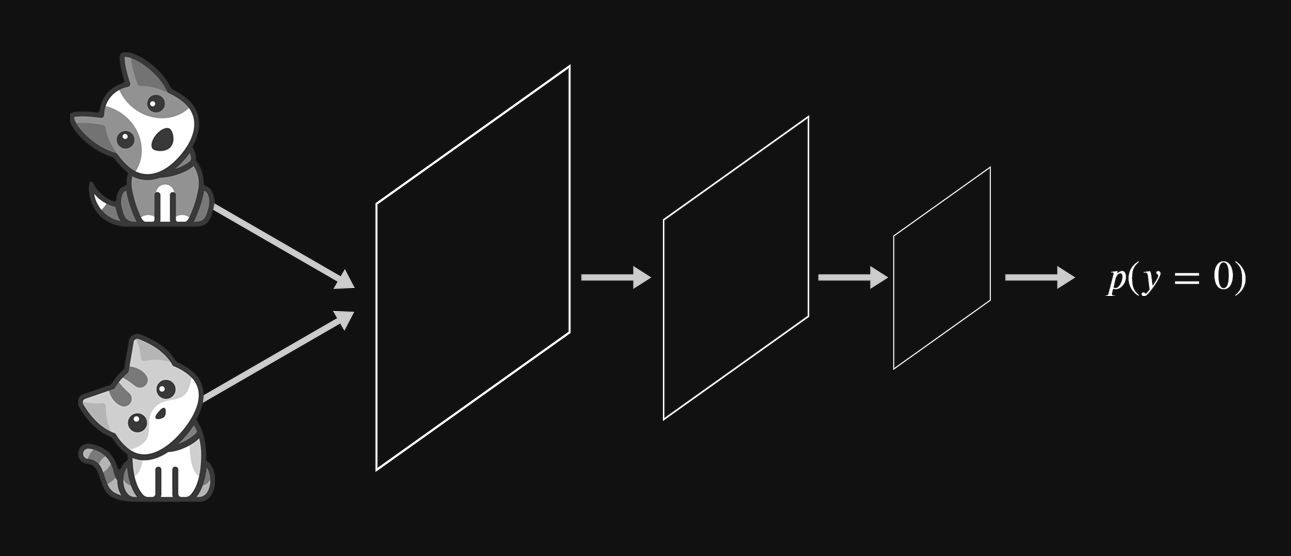

Tai labai panašu į tai kas mes nagrinėjome ir darėme su MLP, bet šį kartą turime konvoliucinius sluoksnius, kuriuos šiose paskaitose detaliai aptarsime. Dar viena dažnas CNN taikymas greta tipinės klasifikacijos yra `objektų aptikimas`.

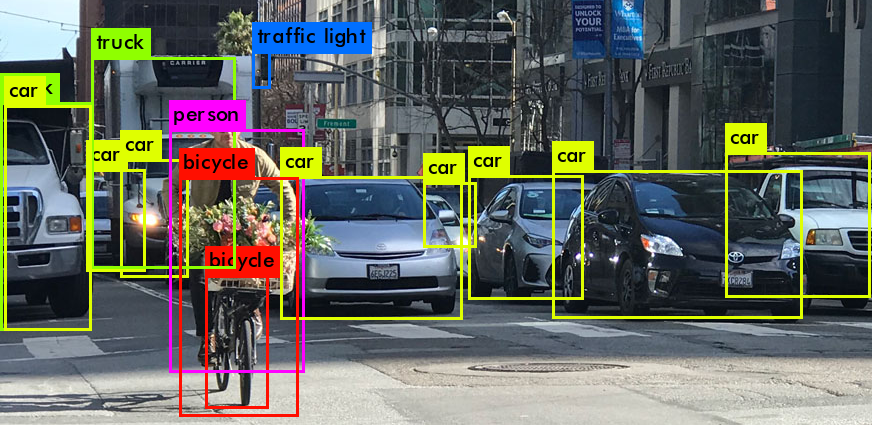

Galima apie tai galvoti kaip apie mikstūra tarp klasifikacijos ir objektų aptikimo, tipiškai yra nustatomas ribojantis langelis (ang. bounding box) bet tai pat ir nustatoma klasė kuri atliepia kas yra ribjančiame langelyje. Tai iš esmės yra du uždaviniai , vienas iš jų identifikuoti objektą tarkime automobilį bet tai pat ir priskirti klasės etiketę šiam nustatytam obejktui. Tinklas išmoksta kur piešti šiuos langelius (tai tarytumei regresijos uždavinys kurioje išmokstamos dvi koordinatės o kitos dvi gali būti išvestos). Labai dažnas tokių problemų sprendimui yra naudojamas <code>**[YOLO, - you only look once](https://pjreddie.com/darknet/yolo/)**</code> bet tai pat yra ir kitų metodų šiam uždaviniui. 

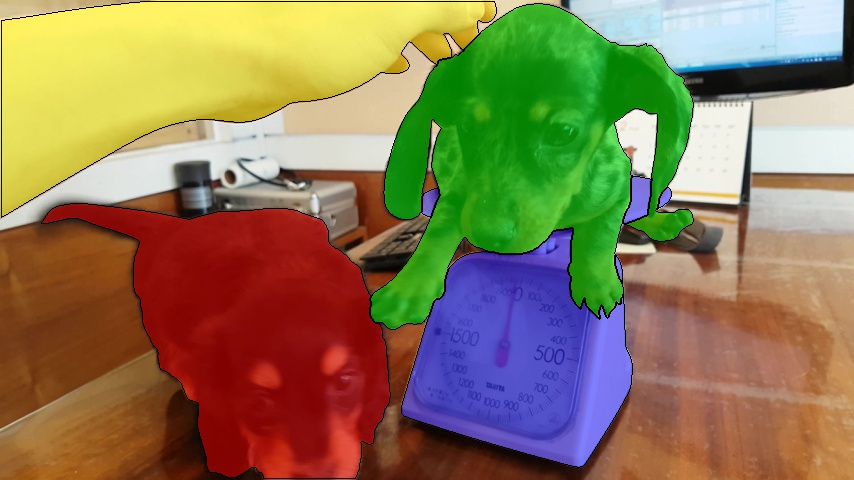

Tai pat yra uždavinys susijęs su objektu aptikimu tačiau tai yra `objekto segmentacija`. Tai sąlyginai panašu bet užuot idetifikavus tik dežę tai pat aptikti tikslią kaukę, objekto perdangą. Tai tarytumei tiksli objekto aptikiko versija. Tradiciškai šį uždavinš sprendžia `Mask R-CNN` tipo tinklai. Tai pat dar vienas dažnas uždavinys kuri sprendžia CNN tipo tinklai yra `veidų atpažinimas` tai gana panašu į klasifikaciją bet ne visai. Tai dažniausiai yra taip vadinama pair-wise comparisons arba [triplet loss](https://en.wikipedia.org/wiki/Triplet_loss) metodika spręsti tapatybės atpažinimo uždaviniui. Esmė yra palyginimas ir gauti panašumo tapatumo įvertinimą. Jeigu yra lyginimamos dvi įvestis su to pačio žmogaus atvaizdu gausime aukštą tapatumą, ir atvirkšiai. Vienas iš pavyzdžiu būtų naudojant siamo tinklus, tai reiškia turime du konvoliucinus tinklus ir sukuria (embeddings) kaip atvaizdo savybių reprezentaciją ir tuo pagrindu yra apskaičuojamas panašumas. 

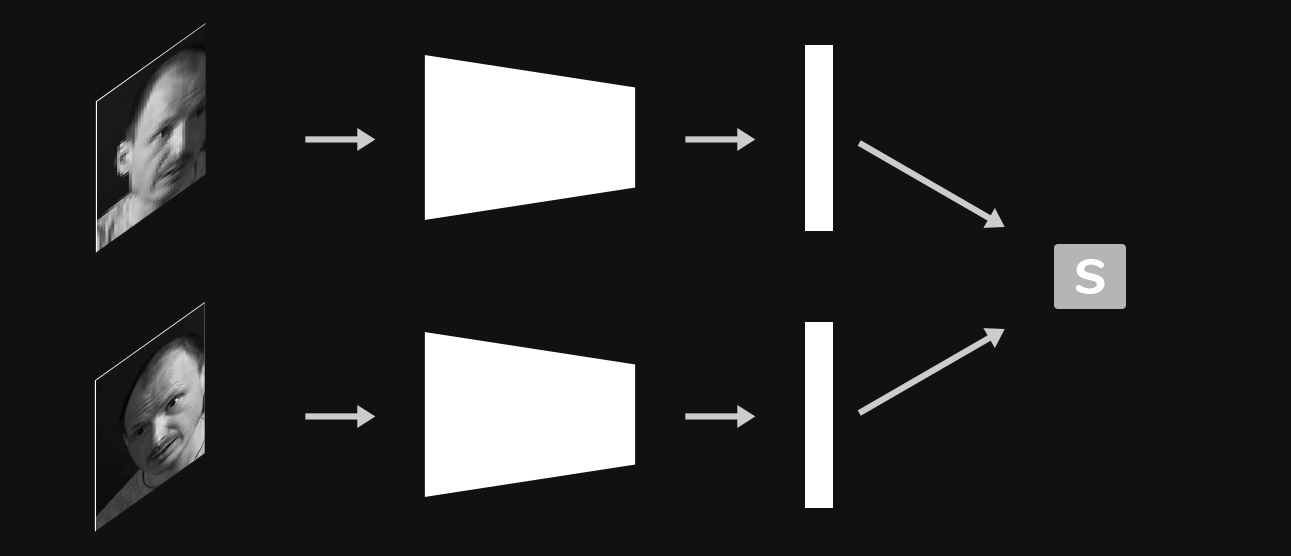

Mes naudosime šiek tiek vėliau generatyvius priešiškus tinklus, todėl vaizdų generavimui mes galėsi panaudoti CNN. Kalbant apie GAN tiklus tai jie gali generuoti duomenys, turėsime dedikuotas paskaitas būtent čiai tiklo architektūrai ir veikimo principams. Principė schema yra tokia kad turime `generatorių` ir `diskriminatorių`. Generatorius ima kaip įvestį triukšmą iš atsitikninės distribucijos tuomet tai keliauja per CNN sluoksnius ir yra sukuriamas vaizdas iš triukšmo vektoriaus. Kažkuria prasme tai tarytumei invertuotas CNN kurio išeiga yra sitetiniai vaizdai. Diskriminatoriaus darbas yra nustatyti ar šie atvaizdai yra tikri ar sugeneruoti. Generatorius yra treniruojamas taip kad sugebėtų apgauti diskriminatorių jog jis manytu jog sintentinis vaizdas yra tikras ir ateina iš treniravimo duomenų rinkinio. Diskriminatorius mėgina atskirti sintentinius ir tikrus vaizdus geriau kaip tik gali, tai šie du tiklai tiesiog mokosi būti geresni su savo uždaviniu. Tai tarytumei [minimax žaidimas](https://en.wikipedia.org/wiki/Minimax). Galima nuveikti labai daug linksmų ir idomių dalykų su šiais tinklais, vienas iš praktinių uždavinių yra kurti didelius sintentinius duomenų rinkinius. 

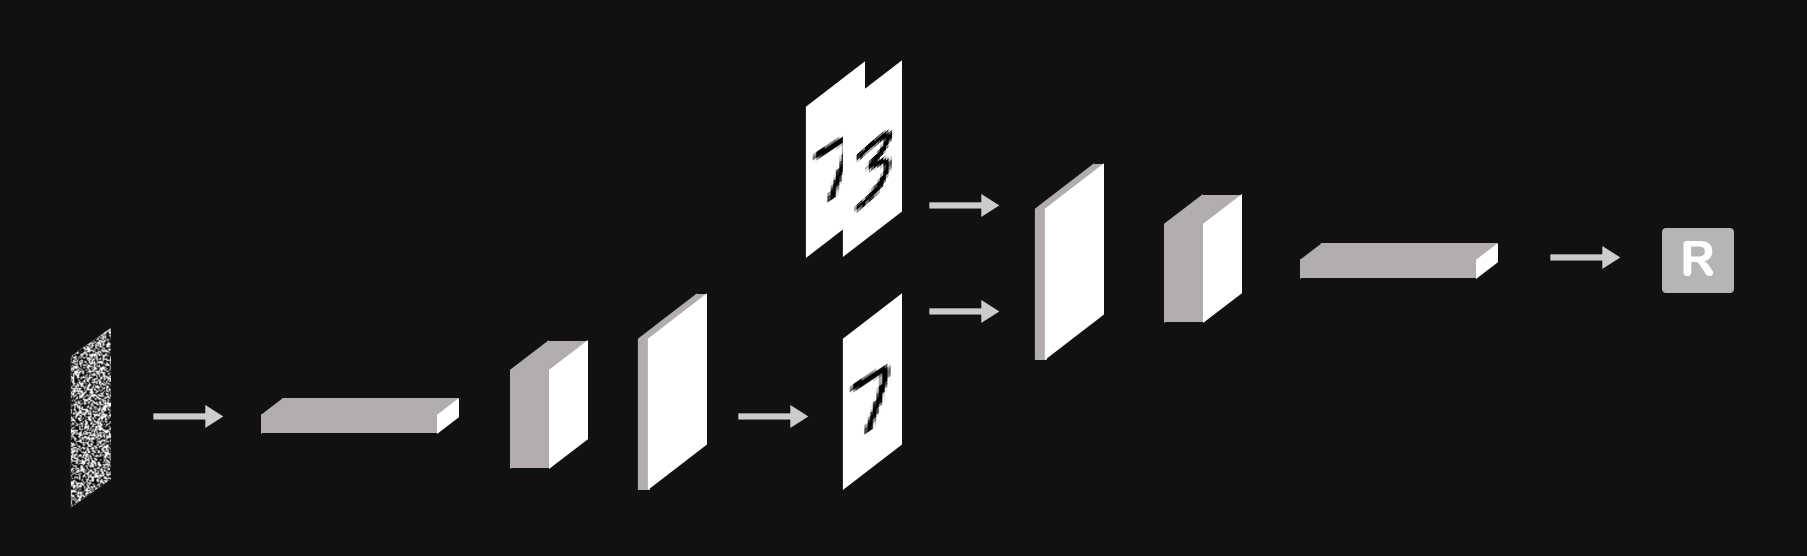

## Vaizdų klasifikavimas ir su tuo susiję iššūkiai

Kompiuterinės regos problema ir vaizdų klasifikacija yra sunki užduotis. Galbut nedažnai susimąstome apie tai kokio sudėtingumo tai problema. Jeigu pažiurėsite į šitą katiną, turbut nebus sunku atspėti jog tai tas pats katinas.

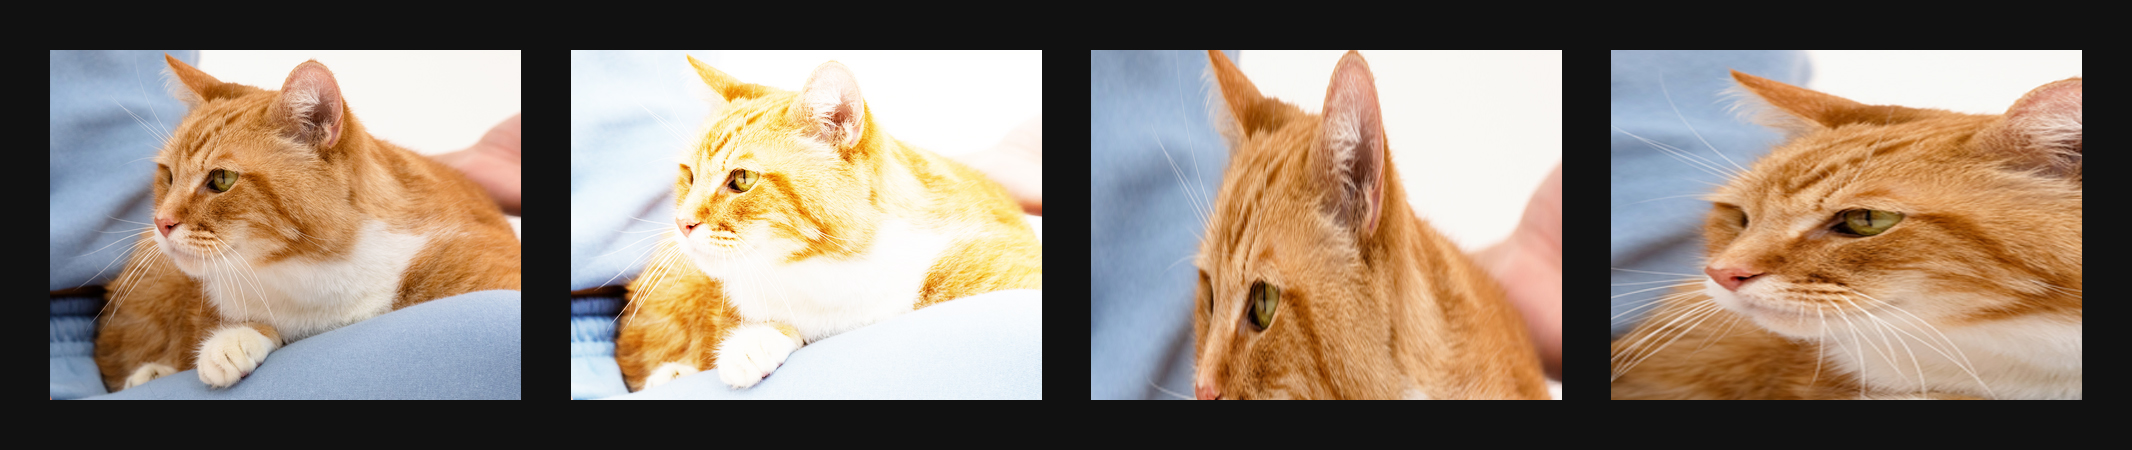

Bet standartiniam neuroniniam tinklui tai kur kas sunkiau. Jeigu atsimenate nesenai nagrinėtą MLP ir kaip mes juos naudojome. Mes sujungdavome atvaizdo eilutes į vieną ilgą vektorių kaip įvestį MLP tinklui.

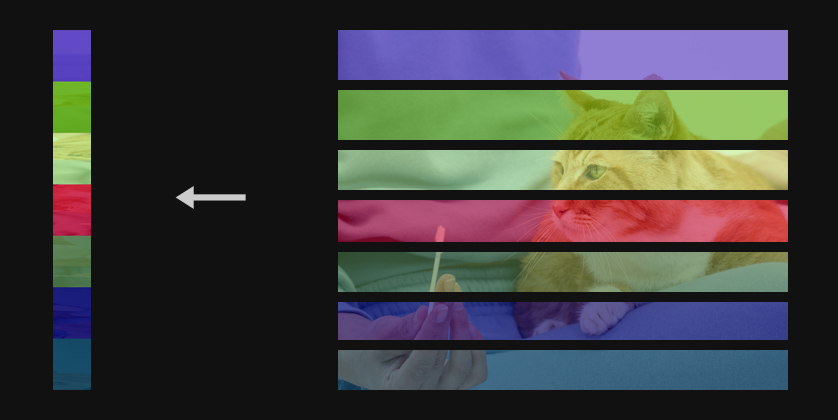

Pirmame sluoksnyje viskas yra pilnai sujungta. To nepeišime bet principe galime suvokti kad bus labai tankus sluoksnis. Jeigu atsimenate kaip skaičiuosime aktivacija, tai bus bendrinė įvestis su pridėtu poslinku.

\begin{multline*}
\sum_{i}x_{i}w_{i} + b
\end{multline*}

Šiuo principu mes susumuojame savybių vertes. Bet jeigu vertinsite tą kitą katiną atvaizdą kuris yra su didesniu kontrastu kas atsitiks kad bendrinė įvestis bus aukštesnės reikšmės nes šviesesni pikseliai yra aukštesnės reikšmės. Taigi kai keičiasi apšvietimas, kontrastas ir kt. aplinkybių charakteristikos kaip šviesos savybės tai labai ryškiai paveiks tinklo rezultatus. Net jeigu pasirpunsime kontrastu ir šviesa su preprocesoriais gali būti atveju kai vaizdas bus kokiomis nors distorcijomis. Ir jeigu lyginti du vaizdus galime isivaizduoti kad tas pats pikselis atsiduręs įvesties vektoriuje turės visiškai skirtingą svorį kai skaičiuosime aktivacijas. Kiekviena linija turi skirtingus svorius todėl priklausomai nuo to kur yra objektas visada skirsis skaičiavimu rezultatas.

<code>**Rankomis sukurtos savybės**</code><br>
Prieš atsirandant CNN buvo kai kokios strategijos kurios sąlyginai spręndė šią problemą. Tarkime vildagių duomenų rinkinys, vietoje pačių vilkdagių nuotraukų botanikai atliko žiedų parametrų (ilgio , pločio) apskaičviavimus ir tai buvo rankiniu budu gaunamos savybės (x). Tai pat dar ir spalvų intesyvumas kaip potenciali savybė.

<code>**Vaizdų apdorojimas**</code><br>
Vis dar dažnai naudingas dirban su CNN, jeigu atismenate MNIST skaičius tai yra apdorotas duomenų rinkinys nes skaičiai buvo rašomi ant popieriaus, todėl reikėjo pašalinti popieriaus tekstūrą ir kitus artefaktus, tai pat visi skaičiai yra išcentruoti. Bet jeigu pažiurėsime į tikro pasaulio vaizdus tai dažniausiai mes turime net tik `ROI (region of interest)` bet ir daugybę kitų dalykų, todėl tai reikalauti papildomu algoritmų kurie tokius vaizdus apkirptų ir ROI išcentruotu. Tačiau jeigu duomenų rinkinys turi 1 mln. pavyzdžiu tai bus laiku imlus procesas. Ir šiandien CNN mokydamasis iš atvaizdų kuriuose yra daugybę dalykų jis išmoks akcentuoti ROI iš aplinkos ir išmoks kaip ištraukti objektus, išskyrti savybės kurios yra konkretaus objekto bruožai.

## CNN pagrindai

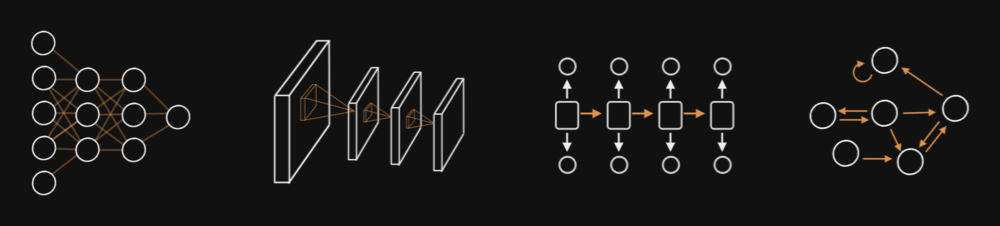

Neuroninių tinklų prielaidos:
- Daugiasluoksnis perceptronas mano kad savybės yra nepriklausomos
- Konvoliucinis tinklas turi <code>**lokalumo prielaida**</code>
- Rekurentiniai - laiko priklausomybės arba sekos prielaidos
- Pastiprinamojo mokymosi tinklas turi specifiškumo prielaida

Jeigu atkrepsite dėmesį į 2D CNN diagramą iliustracijoje tas dydelis kvadratas yra mūsų vaizdas ir konvoliucins tinklas daro asumcijas kad šie pažymėti ruožai, pikseliai tam tikroje kaimynysteje yra susiję tarpusavyje. Isivaizduokite kad jus nuepiešiate ant popieriaus žmogaus veidą (taip kaip išeina). Tam tikri regiono pikseliai tarkim priklausys akiai, nosiai, burnai ir t.t. Ir šie pikseliai nėra nepriklausomi, jie turi lokalias priklausomybes ir tai yra būtent tai ką CNN mėgina registruoti/išmokti.

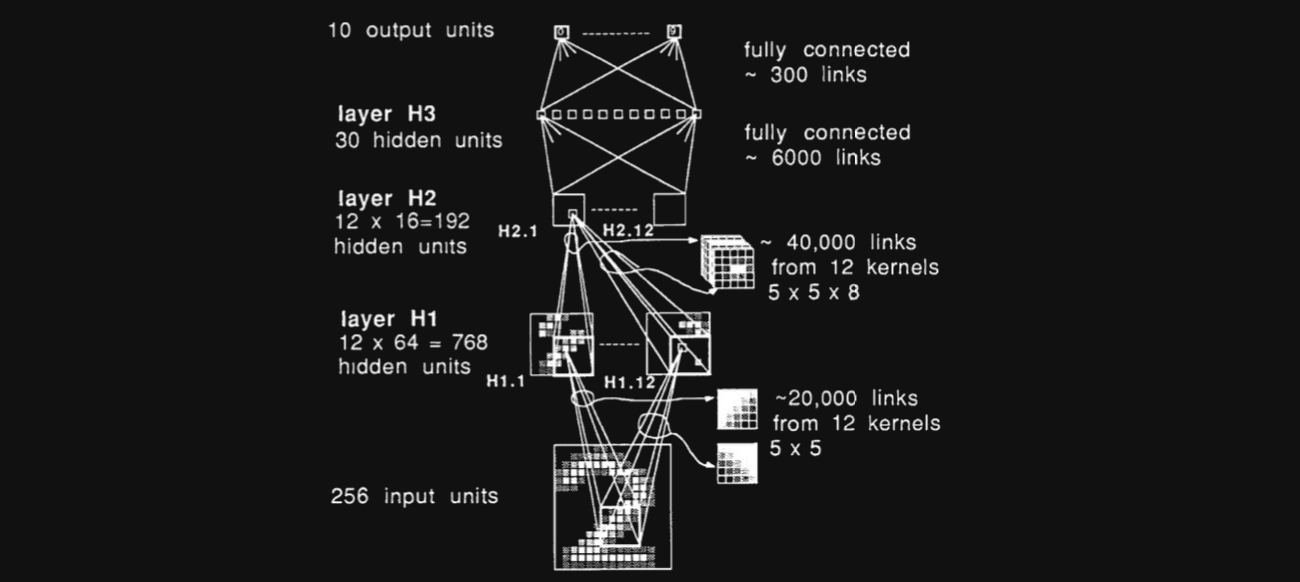

Čia iliustracija iš pačio pirmojo konvoliucinio neuroninio tinklo publikacijos 1989. <br>
`Backpropagation Applied to Handwritten Zip Code Recognition`<br>
`Autoriai Y. LeCun. B. Boser. J. S. Denker. D. Henderson. R. E. Howard. W. Hubbard`

Ši architektūra (ne ši konkreti) vis dar aktuali ir yra pagrindinė vaizdų klasifikacijoje. Autoriai naudojo ranka rašytus skaičius (pašto kodai) panašius į MNIST, įvesties dydis buvo 256 t.y 16x16 dydžio paveiksliukai. Jeigu atkreipsite dėmėsį į iliustracija tai išvesties pikseliai iš konkretaus regiono tampa pikseliais kitame sluoksnyje. Kiekviena sluoksnyje yra ruožai kurie yra analizuojami ir keliauja į sekantį sluoksnį. Tai kas čia vyksta yra savybių ištraukimas. Ir man atrodo kad demonostracijoje tai nebuvo statiniai paveiksleliai o slekanti skaičiaus animacija ir analizė vykė iš slenkant iš kairės į dešinę, einant iš viršaus į apačią. Čia gal nelabai ryškiai matosi bet pirmame sluoksnyje yra 12 savybių žemėlapių (feature maps).

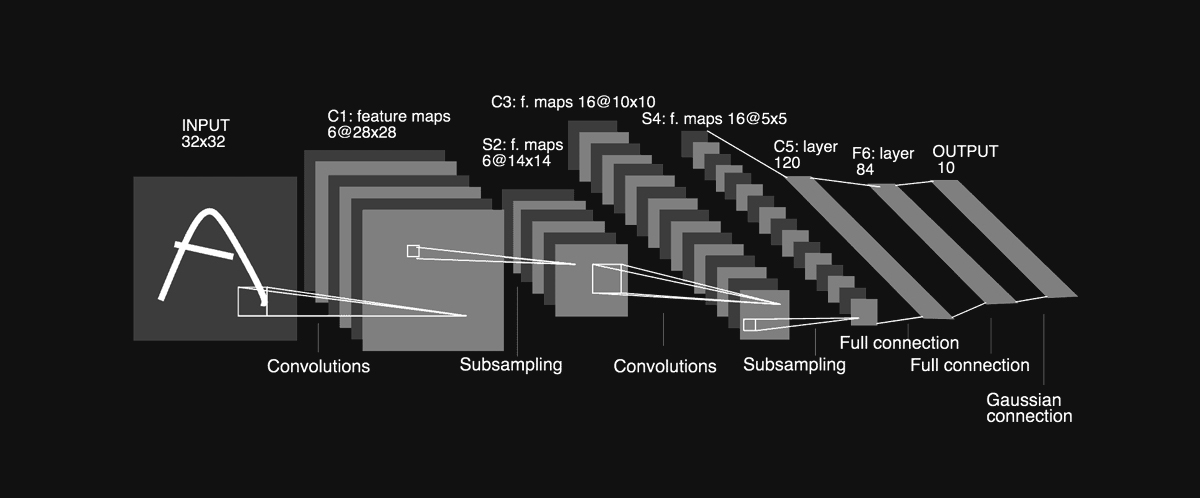

Čia illiustracija iš publikacijoje kurioje CNN (LeNet -5) buvo pritaikytas dokumentų atpažinimui. Įvestis jau šiek tiek didesnė 32x32, ir tai jau įraukia alfabeto ir numerinius simbolius. Čia taikoma ta pati koncepcija kurią lengviau galime interpretuoti. Mes atliksime šios paskaitos pabaigoje šio CNN programinį pritaikymą su PyTorch. 

Balti kvadratėlių ruožai yra taip vadinamos konvoliucijos tai operacijos kuriose imamas ruožas iš įvesties  ir projektuojamas savybių žemėlapyje. Mes vėliau aptarsime kokie skaičiavimai yra taikomi šiai operacijai. 
Kol kas manykite kad šie pikseliai yra apibendrinami į vieną piskelį kuris pernešamas į kitą taip vadinamą `savybių žemėlapį`.  Pirmame sluoksnyje mes turime 6 tokius žemėlapius. Tas kvadrato ruožas isivaizduokite pradeda operaciją nuo kairės viršuje, atlieka skaičiavimus ir pasislenka per viena pikselį dešiniau ir tai kartojasi iki yra tokiu budu pereinamas visa įvestis ir išeiga yra 28x28 pikselių dydžio savybių žėmėlapis. Ivyksta tam tikra informacijos redukcija/kompresija dėl nukirpimo nes tas baltas ruoželis yra `branduolys (ang. kernel) arba filtras (ang. filter)` yra 5x5 dydžio todėl yra nukerpama šiek tiek nuo pradinės įvesties. Ir ši procedura kartojasi iš vieno savybių žemėlapio į kitą ir t.t mes ištraukiame šiuos savybių žemėlapius. Tai pat yra žignis kuomet pridedami kanalai (channels), tai pirmajame sluoksnyje yra 6 kanalai, šie kanalai atsirana naudojant 6 skirtingus savybių detektorius.

Iš antro į trečiajį sluoksnį yra `subimties ėmimas (angl. subsampling)` tai pat dar vadinamas `max pooling` tai veikia kaip reduktorius <b>(neturi svorių)</b>. Tada vėl seka konvoliucija ir po jos mes turime 16 savybių žemėlapių ir vėl subsampling reduktorius ir galiausiai `pertvarkomi duomenys į vektorių (ang. reshape)`. Galiausiai galime naudoti pilnai sujungtas sluoksnius, kad apskaičiuoti išvestis (klasių etiketes). Ši architektūra susideda iš dvejų dalių:
 - Automatinis savybių ištraukimas
 - MLP tipinis klasifikatorius

### Pagridinės koncepcijos

<code>**Nedidelis ryšys (ang. sparce connectivity):**</code> vienas elementas savybių žemėlapyje yra prijungtas tik prie mažos pikselių dalies. Tai labai skiriasi nuo prisijungimo prie viso įvesties vaizdo daugiasluoksnių perceptronų atveju (full connectivity).<br>

<code>**Parametrų dalybos (angl. parameter sharing):**</code> tie patys svoriai yra naudojami skirtingiems įvesties vaizdo ruožams.<br>

<code>**Daug sluoksnių (ang. many layers):**</code>derinant išgautą vietinį modelį su globaliais modeliais.



## Konvoliuciniai filtrai ir svorio pasidalijimas

Savybių detektorius <code>**(kernel, filter)**</code> slenka per įvestį kad sugeneruotu savybių žemėlapį. Tie įvesties pikseliai kuriuos perdengia savybių detektorius yra vadinami (ang. receptive field). Operacija kurią atliekia šis detektorius yra <code>**bendrinė suma**</code>

\begin{multline*}
\sum^{s}_{j=i}w_{j}x_{j}
\end{multline*}

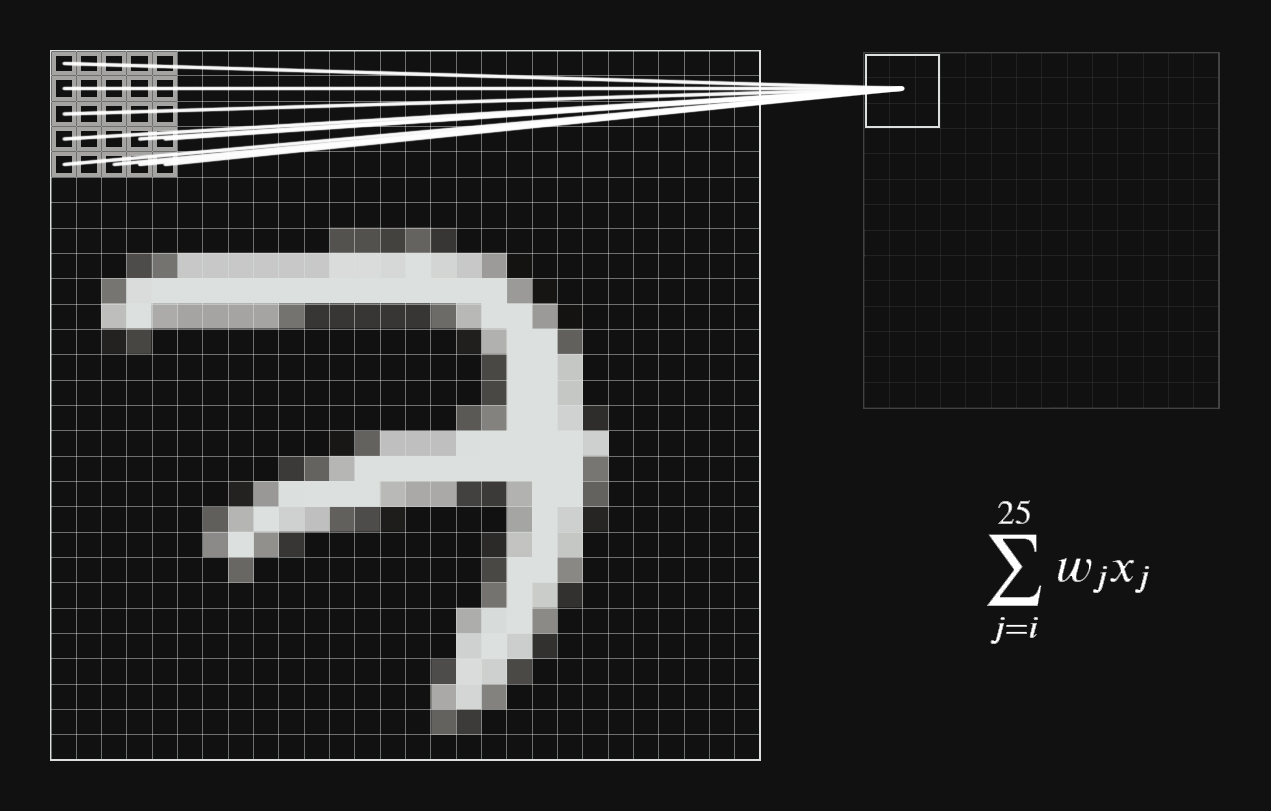

\begin{multline*}
\begin{bmatrix}
w_{1} & w_{2} & w_{3} & w_{4} & w_{5} \\
w_{6} & w_{7} & w_{8} & w_{9} & w_{10} \\
w_{11} & w_{12} & w_{13} & w_{14} & w_{15} \\
w_{16} & w_{17} & w_{18} & w_{19} & w_{20} \\
w_{21} & w_{22} & w_{23} & w_{24} & w_{25} 
\end{bmatrix}
\end{multline*}

\begin{multline*}
\begin{bmatrix}
x_{1} & x_{2} & x_{3} & x_{4} & x_{5} \\
x_{6} & x_{7} & x_{8} & x_{9} & x_{10} \\
x_{11} & x_{12} & x_{13} & x_{14} & x_{15} \\
x_{16} & x_{17} & x_{18} & x_{19} & x_{20} \\
x_{21} & x_{22} & x_{23} & x_{24} & x_{25} 
\end{bmatrix}
\end{multline*}

Svorio pasidalijimas leidžia sumažinti pačių svorių kiekį, nes jų ir reikia mažiau. Jeigu turėtume daug savybių detektorių kiekvieną regionui skaičiavimu prasme tai būtų labai brangu. Turėtume daug svorių ir iš esmės tai būtų beveik pilnai sujungtas tinklas. Tai pat naudojant vieną sabybių detektorių kuris slenką pro įvestis vaizdą ir tarkime gali nustatyti kraštines tuomet šis detektorius bus naudingas ir kitose vaizdo dalyse. Mes vėliau aptarsime ir pasižiūrėsime ką išmoksta šie savybių detektoriai.

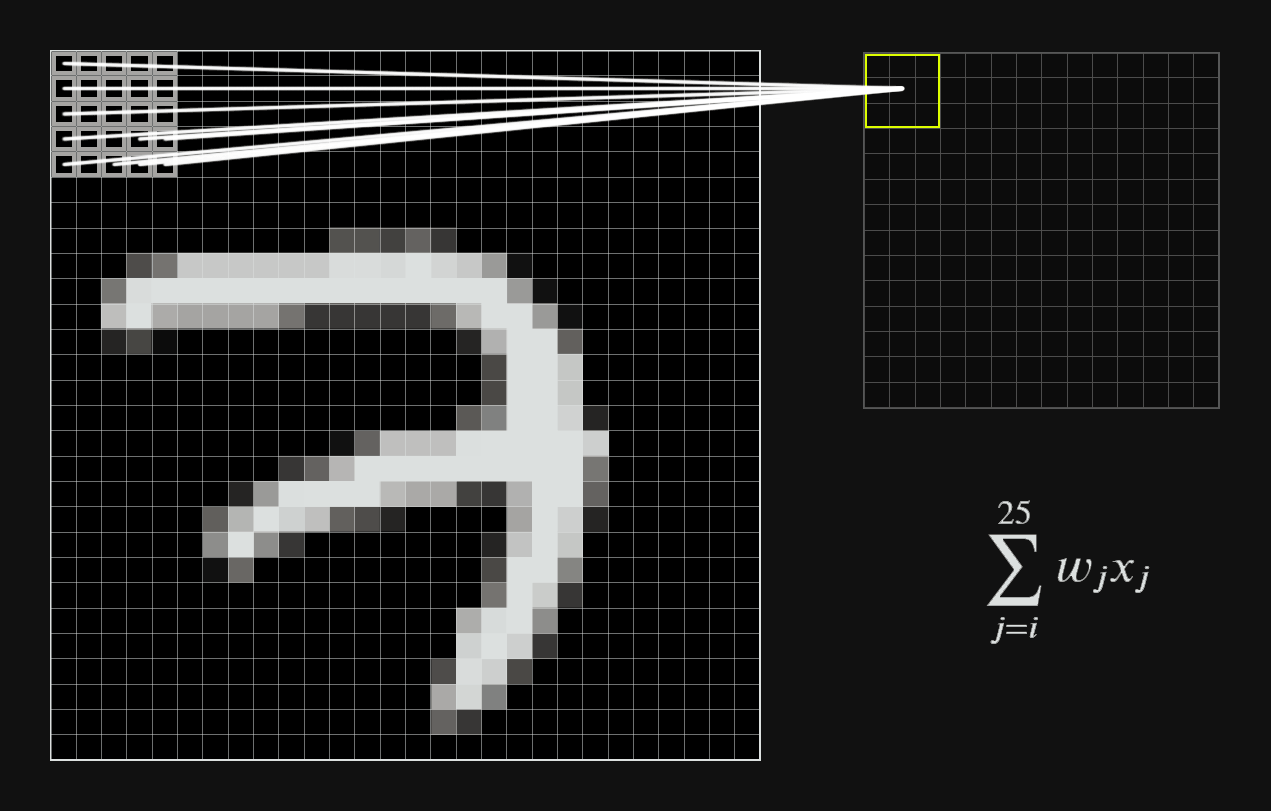

Taip suskaičiuojamas savybių žemėlapis ir toliau galime pritaikyti subimties ėmimą , ką tai pat vadiname `pooling` arba pritaikyti kitą konvoliuciją projektuojant į kitą sluoksnį ir taip tinklas nuosekliai išskiria savybes iš vaizdo.

Bet mes galime naudoti keletą savybių detektorių. Tarkime pastarasis buvo tam kad tinklas išmoktu atpažinti kraštines. Bet gali būti ir kitų detektorių tarkime kurie atpažista horizontalias kraštines. Jo darbo principas būtų kone identiškas.

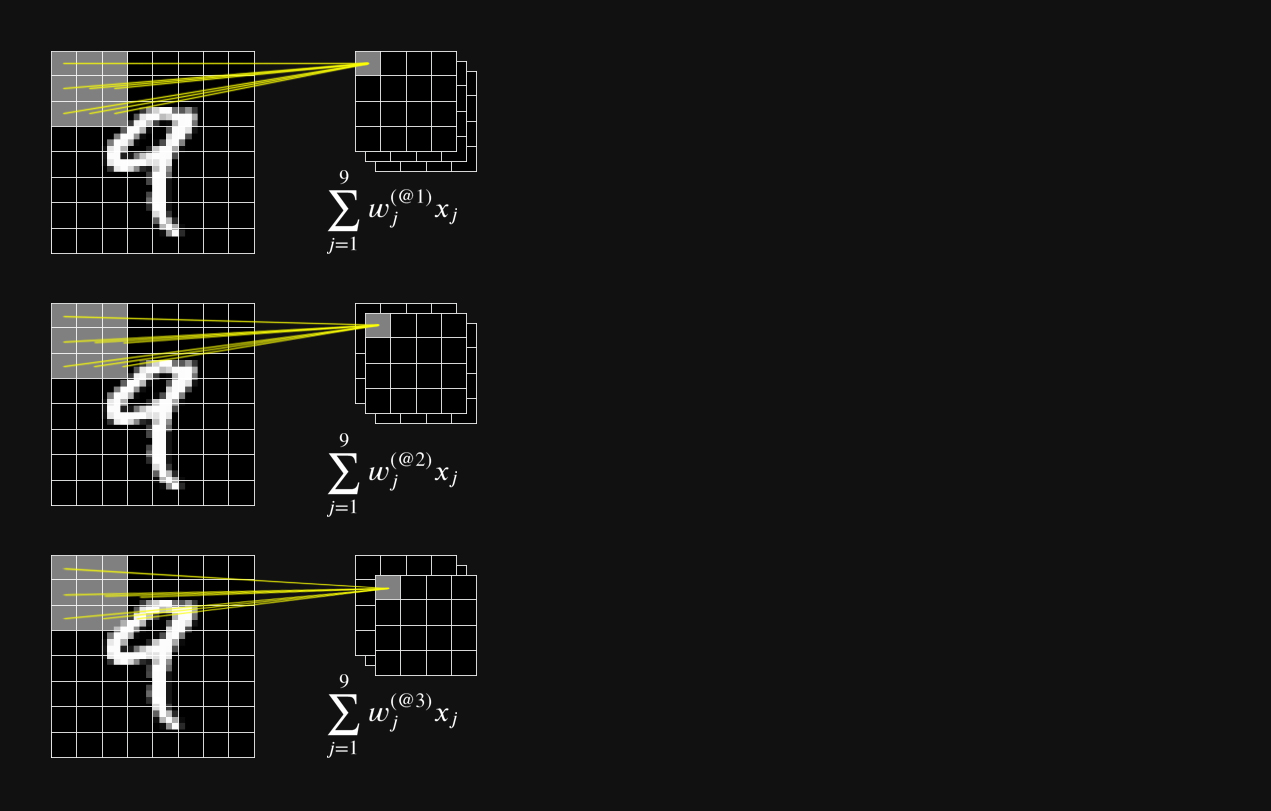

Galima naudoti daug savybių detektorių kad sukurti keletą savybių žemėlapių, taikome juos savarankiškus vienas nuo kito. Tai ta pati koncepcija ir darbo principas.<code>**Vienintelis skirtumas kad svoriai bus skirtingi.**</code>



Savybių žemėlapio dydis iš išvesties prieš ir po konvoliucijos. Tarkime turime įvesties vaizdą 32x32 pikselių ir mūsų filtras yra 5x5 pikselių gauname 28x28 savybių žemėlapį. Kokio dydžio savybių žemėlapį gausime apibrėžia šį lygtis.

\begin{multline*}
O = \dfrac{W - K + 2P}{S} + 1
\end{multline*}

 - <code>**O**</code> išvestis
 - <code>**W**</code> įvesties plotis
 - <code>**K**</code> filtro plotis
 - <code>**P**</code> (ang. padding) kiek eilių nukerpame aplink savo įvestį (aptarsime vėliau)
 - <code>**S**</code> filtro žingsnis per kolonas ir per eilutes (ang. stride), (aptarsime vėliau kiek gali būti žignsių)

In [4]:
int(((32 - 5)/1)+1)

28

In [ ]:
import torch

In [ ]:
conv = torch.nn.Conv2d(
    in_channel=1,
    out_channel=8,
    kernel_size(5,5),
    stride=(1,1)
)

In [ ]:
conv.weight.size()

In [ ]:
conv.bias.size()

In [ ]:
#TODO: max pooling , mean pooling

## Skirtumas tarp kryžminės koreliacijos ir konvoliucijos

\begin{multline*}
Z[i, j] = \sum^{k}_{u = -k} \ \sum^{k}_{v= -k} K[u,v]A[i + u, j + v]
\end{multline*}

\begin{multline*}
Z[i, j] = K \bigotimes A
\end{multline*}

In [7]:
#TODO: coverage

## CNN atgalinis skaičiavimas (backpropagation)

Mes jau pakankamai prisikankinome skaičiuodami kainos funkcijų gradientus atsižvelgiant į svorius kai nagrinėjome ankstenses temas apie tiesinę, logistinę regresiją, vienasluoksnį ir daugiasluoksnį perceptroną. Su CNN atgalinis skaičiavimas veikia tuo pačiu principu kaip ir MLP. Taikome daugiamatę gradinės taisyklę tik dabar dar su papildomais suvaržymais/sąlygomis dėl svorių dalinimosi skirtingiems regionams.

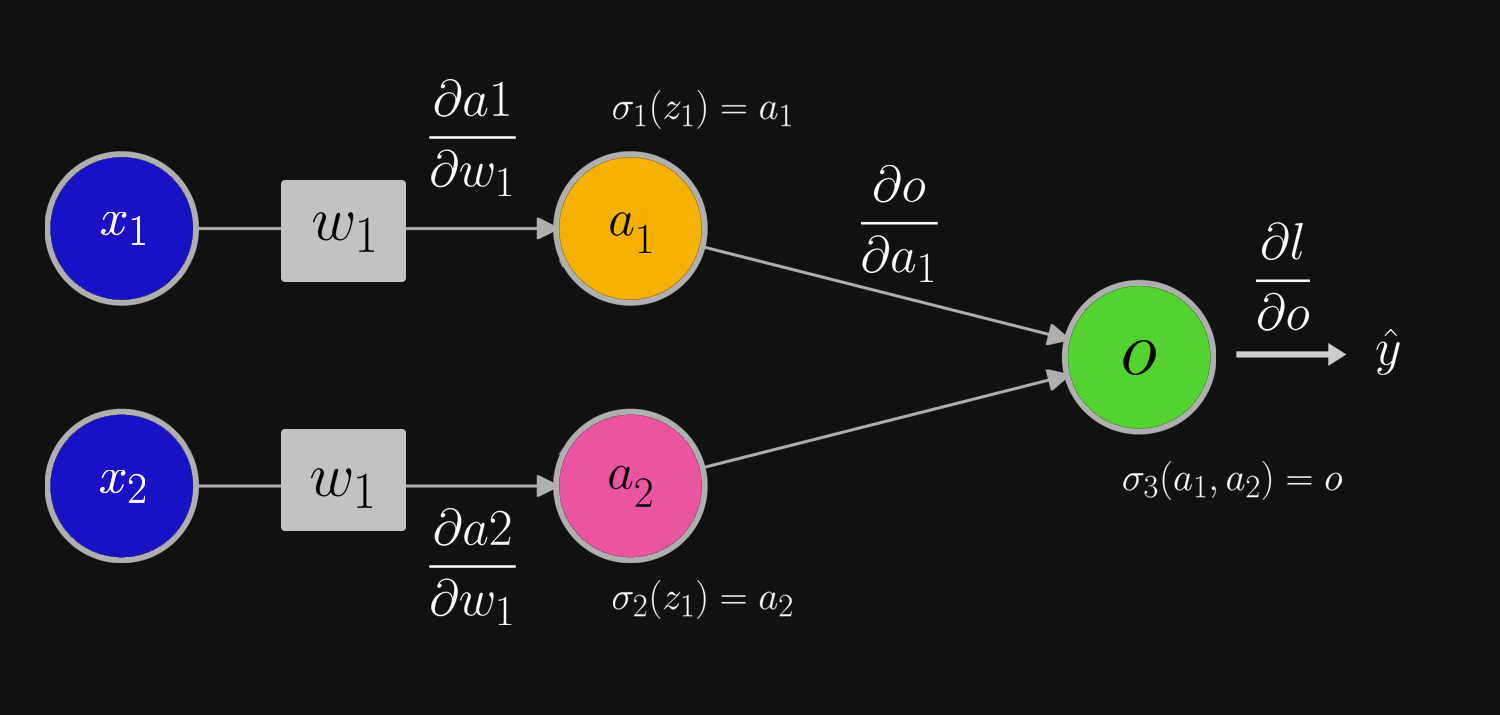

\begin{multline*}
\dfrac{\partial l}{\partial w_{1}} = \dfrac{\partial l}{\partial o} \cdot \dfrac{\partial o}{\partial a_1}
\cdot \dfrac{\partial a_1}{\partial w_1} + \dfrac{\partial l}{\partial o} \cdot \dfrac{\partial o}{\partial a_2} \cdot \dfrac{\partial a_2}{\partial w_1}
\end{multline*}

Tarkime turime dvi įvestis (x1, x2) , apskaičiuojame aktyvacijas žinoma eigoje panaudodami svorius. Bet čia naudojame vienodus svorius. Ir nuo aktyvacijų apskaičiuojame išvestį ir beabejo kainą. 

Mus domina kainos funkcijos dalinė išvestinė atsižvelgiant į svorius. Tai skaičiuojame atgal nuo kainos funkcijos išvestinės atsižvelgiant į išvestį tada išvesties dalinę išvestinę atsižvelgiant į aktivaciją a1 ir tada aktivacijos dalinė išvestine atsižvelgiant į svorį. Ir tas pats kitu keliu. Ir galiausiai šias išvestinės sudedame nes tai daugiamatė gradinės taisyklė. Šis procesas vyksta konvoliuciniame tinkle žinoma turime daug sluoksnių ir tai būtų gana kompliuoktą atvaizduoti.

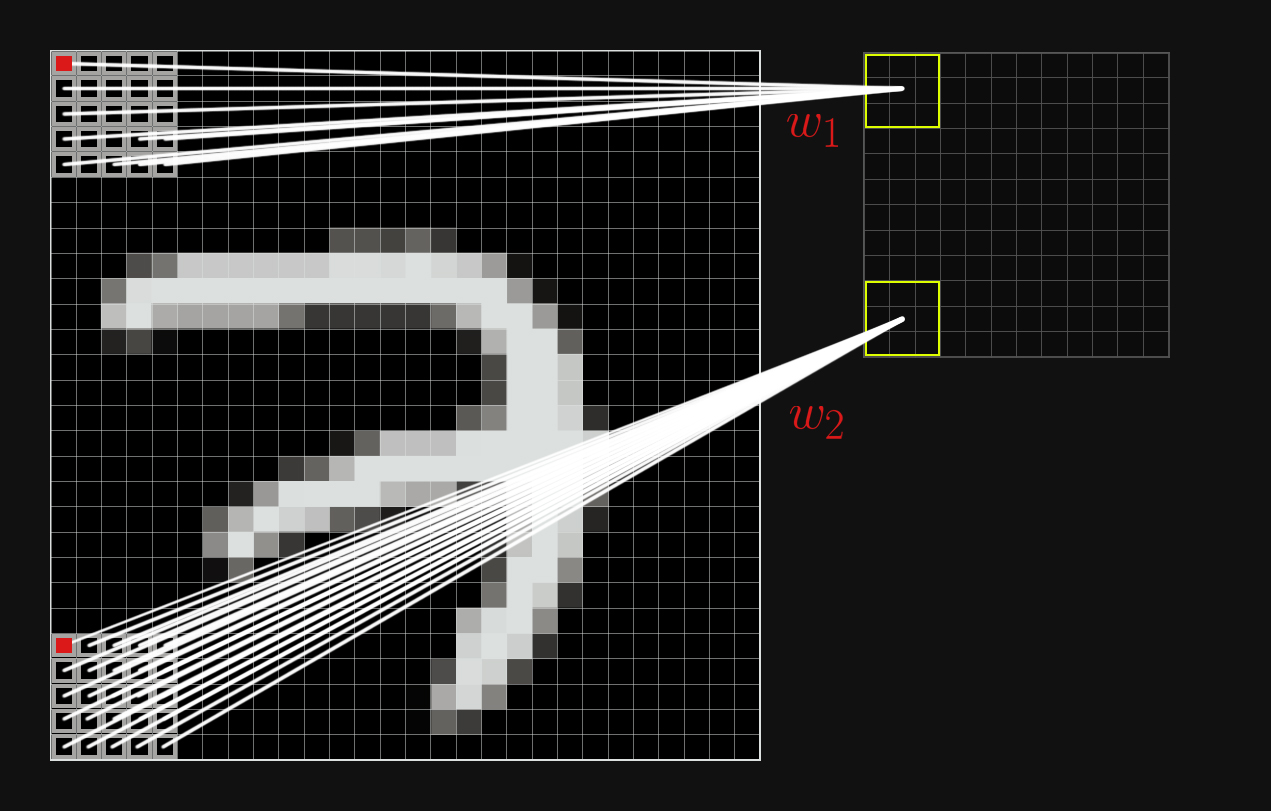

<code>**svorių atnaujinimas**</code><br>

\begin{multline*}
w_1:= w_2:= w_1 - \alpha \cdot \dfrac{1}{2}(\dfrac{\partial \mathcal{L}}{\partial w_1} + \dfrac{\partial \mathcal{L}}{\partial w_2})
\end{multline*}

Mūsų filtrai yra svorių matrica 5x5, todėl kai filtrais apskaičiuojamas tai yra susumuota bendrinė įvestis
\begin{multline*}
 w_1x_1 +  w_2x_2 + w_3x_3 + \ ...
\end{multline*}

## CNN architektūra ir AlexNet

Turint geros kokybės duomenų rinkinį vienas iš aspektų kuris sąlygoją sėkminga CNN pritaikymą spręsti kompiuterinės regos problemas yra geras architektūros pasirinkimas. Aptarsime trumpai pačias populiariausias architektūras.  Mes jau trumpai matėme <code>**LeNet-5**</code> kuri buvo taikoma ranka rašytų simbolių atpažinimui. Bet iš principo CNN nebuvo populiarus nes tradiciniai kompiuterinės regos algoritmai buvo daug greitesni ir turėjo geresnius tikslumo rezultatus.<br>
Iki <code>**[ImageNet](https://www.image-net.org/)**</code> labai populiaraus konkurso kur žmonės varžėsi mėgindami skirtingas kompiuterinės regos technikas klasifikuoti paveikslėlius. Tai labai didelis duomenų rinkinys kuris turi 1.2 milijono duomenų ir 1000 klasių etikečių. Tradiciniai CV algoritmai aplengdavo CNN ir kitus NN. Bet 2012 įvyko kai kas reikšmingo, pirmą kartą CNN aplenkė visus kitus lygi tol pirmavusius CV algoritmus. Ir aplenkė su labai didelę maržą <b>(klaida 15.4%, antro geriausio klaida 26.2%, o šiais laikais yra modelių kurių klaida 0.8%)</b> ir nuo to laiko žmonės masiškai atkreipė dėmėsį į gyliuosius neuroninius tinklus ir konvoliucinius neuroninius tinklus. Tai buvo [AlexNet](https://en.wikipedia.org/wiki/AlexNet) architektūra



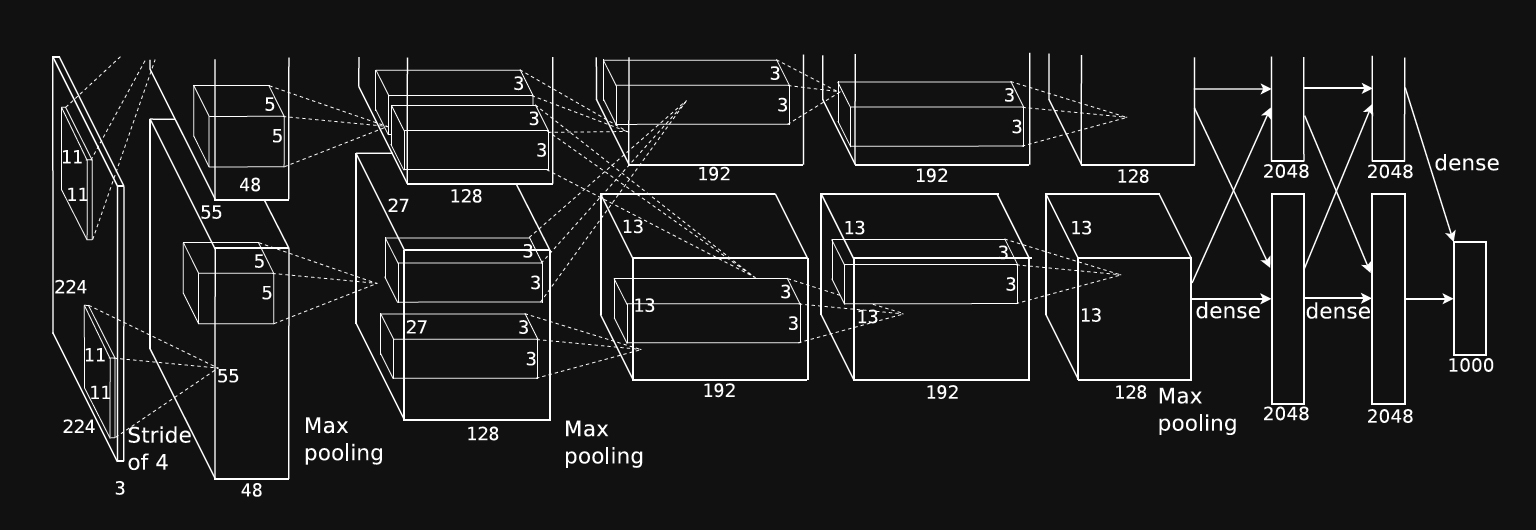

2012 A. Krizhevsky, I.Sutskever ir G.Hinton sugalvojo kaip išnaudoti GPU kad paralelizuoti į dų procesus su šia architetūra.

Čia šiek tiek paprastenė tos pačios architetūros vizualizacija, skirtumas tik tas kad dabar viskas yra viename GPU. Šiek tiek vėliau atliksime šios architektūros implementacija. Matome iš schemos kad mūsų įvestis yra 224x224 ir turime tris spalvos kanalus, aptarsime kaip reikia dirbti su skirtingais spalvų kanalais. Pirmasis savybių žemėlapis turi 96 kanalus, tada sekantis 256, 384, 384, 256 ir gale FC prieš išvedimą. 

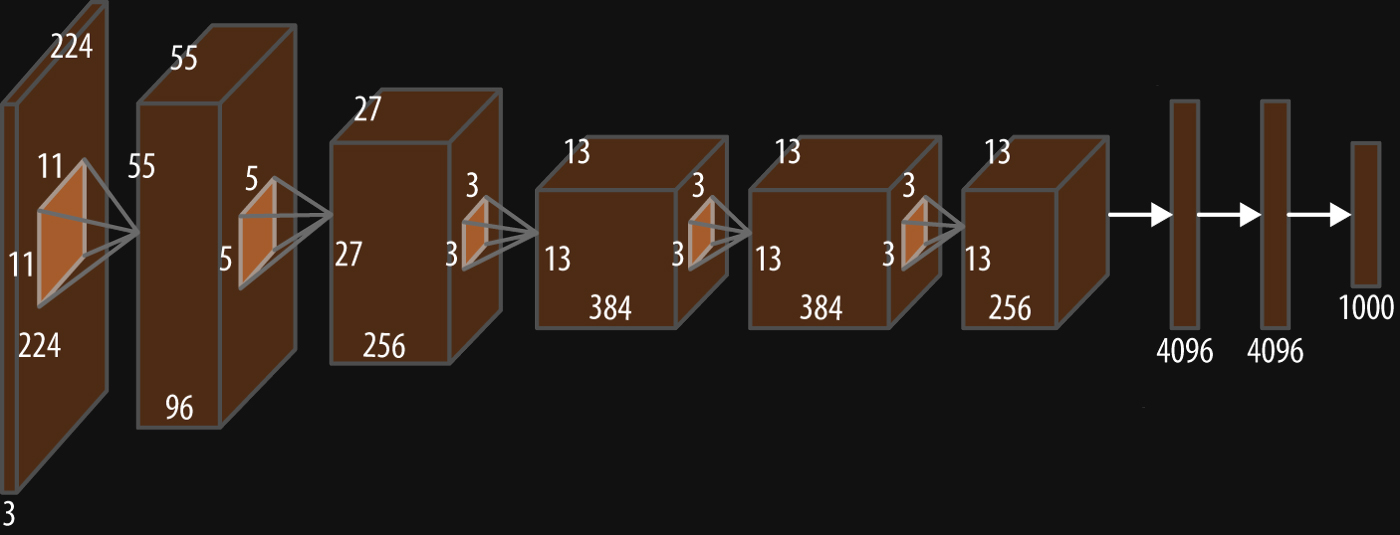

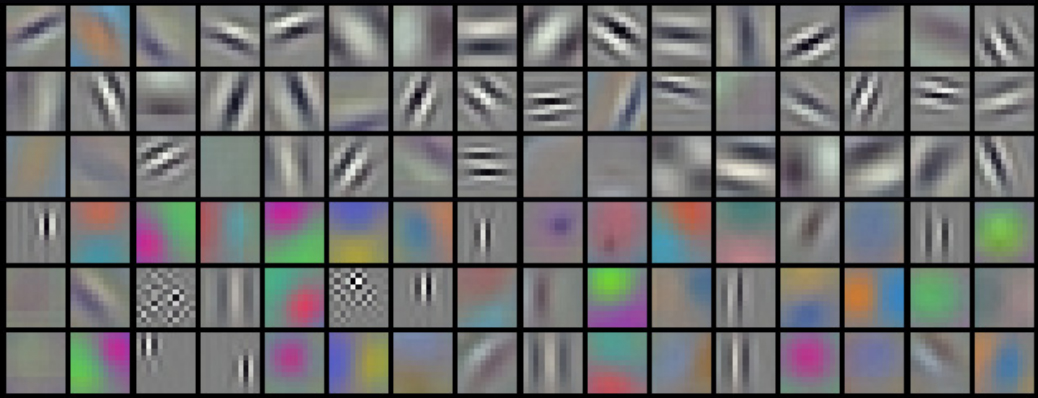

96 convolutional kernels of size 11×11×3 learned by the first convolutional layer on the 224×224×3 input images. The top 48 kernels were learned on GPU 1 while the bottom 48 kernels were learned on GPU

[Architektūros](https://theaisummer.com/static/dfad9981c055b1ba1a37fb3d34ccc4d8/a1792/deep-learning-architectures-plot-2018.png)

### Konvoliucijos su spalvų kanalais

In [6]:
#TODO: pasidaryk normalią iliustracija su etapais

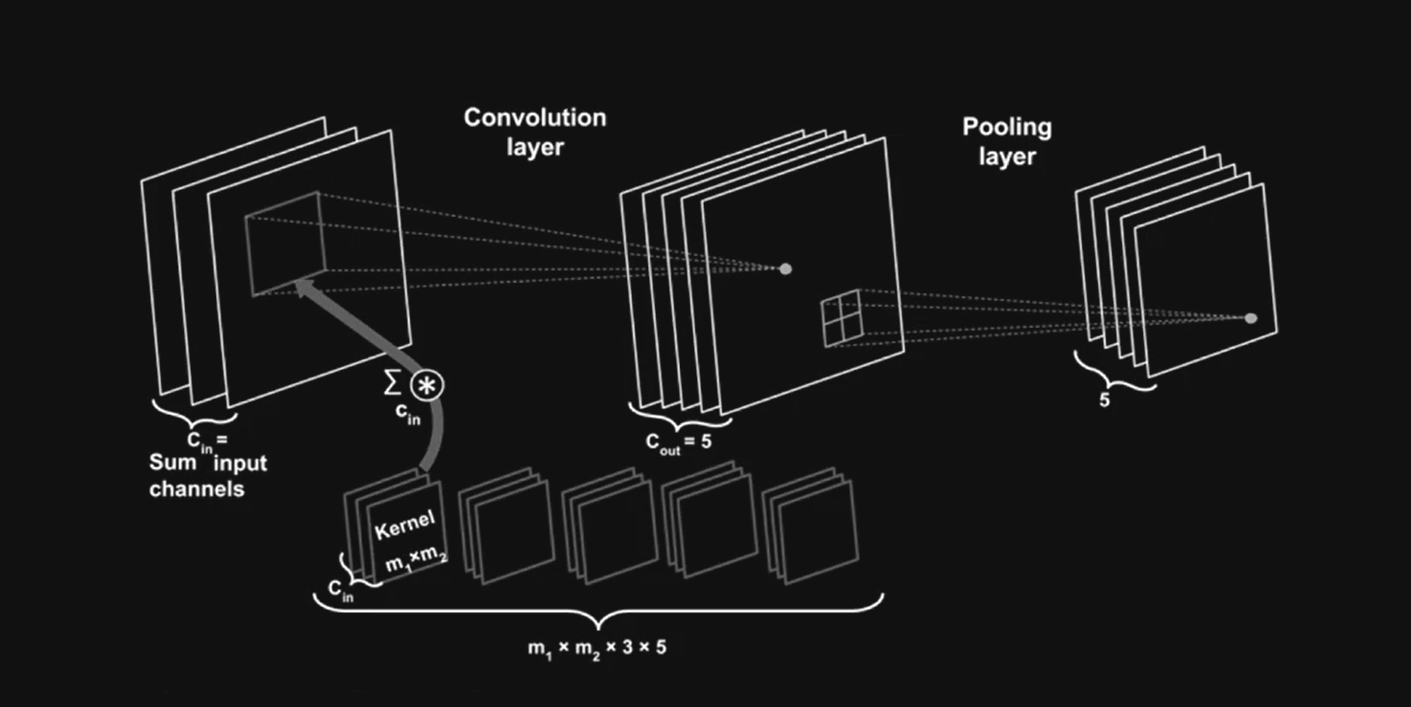

## Ką mato CNN

Žiurint iš tradicinės kompiuterinės regos perspektyvos prieš CNN buvo išrastas žmonės kurė taip vadinamus įvairius detektorius kaip kraštinių detektorius. Kurė šiuo filtrus galvodami apie juos taikydami loginį mastymą. Taip atsirado [Sobel](https://en.wikipedia.org/wiki/Sobel_operator), horizontalių ir vertikalių kraštinių detektoriai ir t.t.

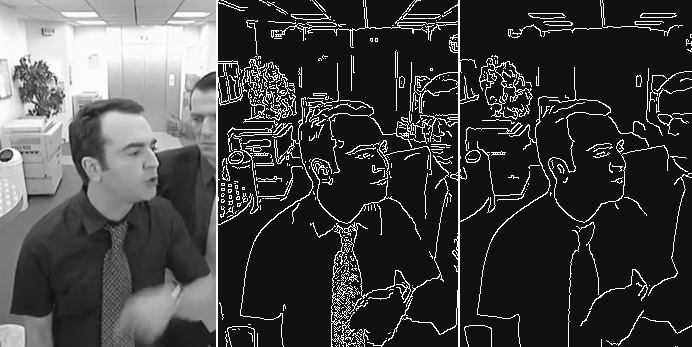

## CNN taikymas

- [LeNet-5 (PyTorch)](./code/__II_LeNet-5.ipynb)
- [AlexNet (PyTorch)](./code/__II_AlexNet.ipynb)

## Modelių išsaugojimas ir įkėlimas

In [ ]:
torch.save(model.state_dict(), 'save_load_data/model.pt')
torch.save(optimizer.state_dict(), 'save_load_data/optimizer.pt')
torch.save(scheduler.state_dict(), 'save_load_data/scheduler.pt')

In [ ]:
model.load_state_dict(torch.load('save_load_data/model.pt'))
optimizer.load_state_dict(torch.load('save_load_data/optimizer.pt'))
scheduler.load_state_dict(torch.load('save_load_data/scheduler.pt'))